<a href="https://colab.research.google.com/github/Srividhyak2011/Demo-Datascienceproject/blob/main/priyaCopy_of_M5_MP6_NB_Corona_tweets_Classification_of_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Data Science and Machine Intelligence
## A Program by IITMadras and TalentSprint
### Mini Project Notebook 06 : Classification of Coronavirus Tweets using NLP Techniques.

## Objectives


* perform data preprocessing/preprocess the text
* represent the text/words using the pretrained word embeddings - Word2Vec/Glove
* build the deep neural network (RNN, LSTM, GRU, CNNs, Bidirectional-LSTM, GRU) to classify the tweets


### Introduction

First we need to understand why sentiment analysis is needed for social media?

People from all around the world have been using social media more than ever. Sentiment analysis on social media data helps to understand the wider public opinion about certain topics such as movies, events, politics, sports, and more and gain valuable insights from this social data. Sentiment analysis has some powerful applications. Nowadays it is also used by some businesses to do market research and understand the customer’s experiences for their products or services.

Now an interesting question about this type of problem statement that may arise in your mind is that why sentiment analysis on COVID-19 Tweets? What is about the coronavirus tweets that would be positive? You may have heard sentiment analysis on movie or book reviews, but what is the purpose of exploring and analyzing this type of data?

The use of social media for communication during the time of crisis has increased remarkably over the recent years. As mentioned above, analyzing social media data is important as it helps understand public sentiment. During the coronavirus pandemic, many people took to social media to express their anger, grief, or sadness while some also spread happiness and positivity. People also used social media to ask their network for help related to vaccines or hospitals during this hard time. Many issues related to this pandemic can also be solved if experts considered this social data. That’s the reason why analyzing this type of data is important to understand the overall issues faced by people.



## Dataset

The given challenge is to build a multiclass classification model to predict the sentiment of Covid-19 tweets. The tweets have been pulled from Twitter and manual tagging has been done. We are given information like Location, Tweet At, Original Tweet, and Sentiment.

The training dataset consists of 36000 tweets and the testing dataset consists of 8955 tweets. There are 5 sentiments namely ‘Positive’, ‘Extremely Positive’, ‘Negative’, ‘Extremely Negative’, and ‘Neutral’ in the sentiment column.

## Description

This dataset has the following information about the user who tweeted:

1. **UserName:** twitter handler
2. **ScreenName:** a personal identifier on Twitter and is separate from the username
3. **Location:** where in the world the person tweets from
4. **TweetAt:** date of the tweet posted (DD-MM-YYYY)
5. **OriginalTweet:** the tweet itself
6. **Sentiment:** sentiment value



## Problem Statement

To build and implement a multiclass classification deep neural network model to classify between Positive/Extremely Positive/Negative/Extremely Negative/Neutral sentiments

## Grading = 10 Marks

In [ ]:
#@title Download Dataset
%%capture
!wget https://cdn.extras.talentsprint.com//DLFA/Experiment_related_data/corona_nlp_test.csv
!wget https://cdn.extras.talentsprint.com//DLFA/Experiment_related_data/corona_nlp_train.csv

## Import required packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
palette=sns.color_palette('magma')
sns.set(palette=palette)


from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download('stopwords')
import re
import string
import nltk

from wordcloud import WordCloud

from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.layers import LSTM
from keras.layers import Bidirectional, Dense, Dropout, Embedding, SpatialDropout1D

from keras.models import Sequential   # the model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##  **Data Loading and Perform Exploratory Data Analysis** (2 Points)

* Load the Dataset
  - Use encoding='ISO-8859-1' when reading csv files


In [ ]:
train = pd.read_csv("/content/corona_nlp_train.csv",encoding="ISO-8859-1")
test = pd.read_csv("/content/corona_nlp_test.csv",encoding="ISO-8859-1")

In [ ]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,62017,Coastal Spain,21-03-2020,Retail analyst Teresa Wickham (of Tunbridge We...,Positive
1,2,57979,NaN,20-03-2020,Prices for display panels are expected to rise...,Positive
2,3,80278,everywhere,06-04-2020,@cryptochrisw Since Covid-19 self quarantine s...,Neutral
3,4,52712,India,18-03-2020,Prices of both\r\r\nKaraknath ( ?)\r\r\nAnd Ka...,Negative
4,5,65192,Everywhere and Nowhere,22-03-2020,Now this is an interesting solution. #handsani...,Extremely Positive


* Check for Missing Values and impute/drop them

In [ ]:
missing_values = train.isna().sum()
print(missing_values)


UserName            0
ScreenName          0
Location         7484
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64


In [ ]:
train_df = train.dropna()
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,62017,Coastal Spain,21-03-2020,Retail analyst Teresa Wickham (of Tunbridge We...,Positive
2,3,80278,everywhere,06-04-2020,@cryptochrisw Since Covid-19 self quarantine s...,Neutral
3,4,52712,India,18-03-2020,Prices of both\r\r\nKaraknath ( ?)\r\r\nAnd Ka...,Negative
4,5,65192,Everywhere and Nowhere,22-03-2020,Now this is an interesting solution. #handsani...,Extremely Positive
5,6,73938,Karachi,31-03-2020,Imran Niazi s govt must take immediate actions...,Negative


* Visualize the sentiment column values


In [ ]:
print("Count Of Labels : {} ".format(train_df.Sentiment.value_counts().to_dict()))
print("Total number of Labels : {}".format(len(train_df.Sentiment.unique())))


Count Of Labels : {'Positive': 7946, 'Negative': 6903, 'Neutral': 5318, 'Extremely Positive': 4587, 'Extremely Negative': 3762} 
Total number of Labels : 5


In [ ]:
def change_sen(sentiment):
    if sentiment == "Extremely Positive":
        return "Positive"
    elif sentiment == "Extremely Negative":
        return "Negative"
    elif sentiment == "Negative":
        return "Negative"
    elif sentiment == "Positive":
        return "Positive"
    else:
        return "Neutral"

train_df['Sentiment'] = train_df['Sentiment'].apply(lambda x : change_sen(x))

count_dict = train_df['Sentiment'].value_counts().to_dict()
Labels = list(count_dict.keys())
values = list(count_dict.values())


<ipython-input-9-58b2426572db>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Sentiment'] = train_df['Sentiment'].apply(lambda x : change_sen(x))


* Visualize top 10 Countries that had the highest tweets using countplot (Tweet count vs Location)


In [ ]:
tweet_count_per_location = train_df.groupby('Location')['OriginalTweet'].count().reset_index()

tweet_count_per_location.rename(columns={'OriginalTweet': 'Tweet_Count'}, inplace=True)
print(tweet_count_per_location)


                                      Location  Tweet_Count
0                                                         4
1                 170825 ? shinee ? svt ? vixx            1
2                      UK to Detroit Worldwide            1
3                      VA - TX - ??- Belgium??            1
4                          #Australia #Oceania            1
...                                        ...          ...
11099  ÃÂÃÂÃÂÃÂT: 45.420317,-75.698901            1
11100    ÃÂÃÂÃÂÃÂT: 45.478969,9.191217            1
11101    ÃÂÃÂÃÂÃÂT: 48.931022,2.244642            1
11102           ÃÂÃÂT: 50.877689,-1.364615            1
11103           ÃÂÃÂT: 53.839856,-0.436773            1

[11104 rows x 2 columns]


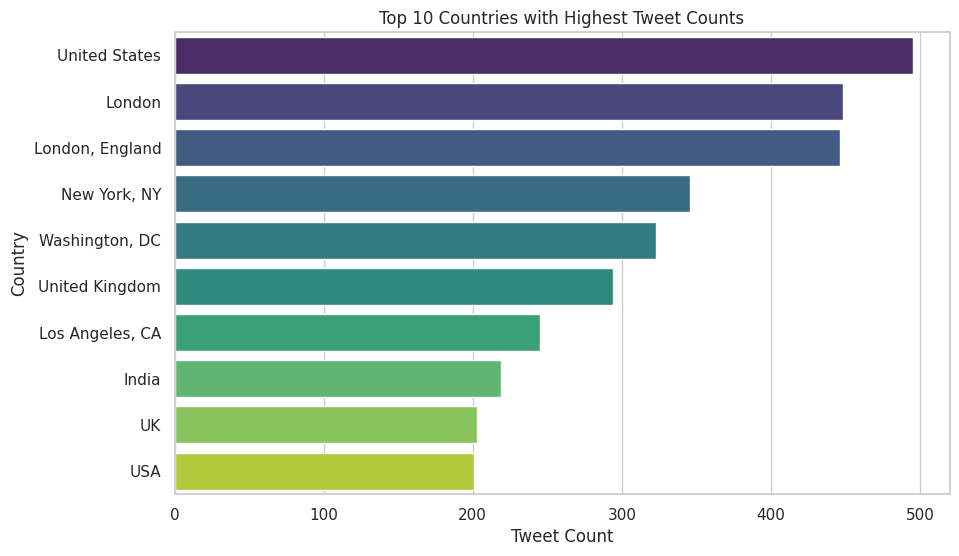

In [ ]:
df_sorted = tweet_count_per_location.sort_values(by='Tweet_Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Tweet_Count', y='Location', data=df_sorted, palette="viridis")
plt.xlabel('Tweet Count')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Tweet Counts')
plt.show()

* Plotting Pie Chart for the Sentiments in percentage


In [ ]:
import plotly.express as px
px.pie(values = values,names = Labels,hole=.5,title = "Sentiments In Percentage")


* WordCloud for the Tweets/Text

    * Visualize the most commonly used words in each sentiment using wordcloud
    * Refer to the following [link](https://medium.com/analytics-vidhya/word-cloud-a-text-visualization-tool-fb7348fbf502) for Word Cloud: A Text Visualization tool




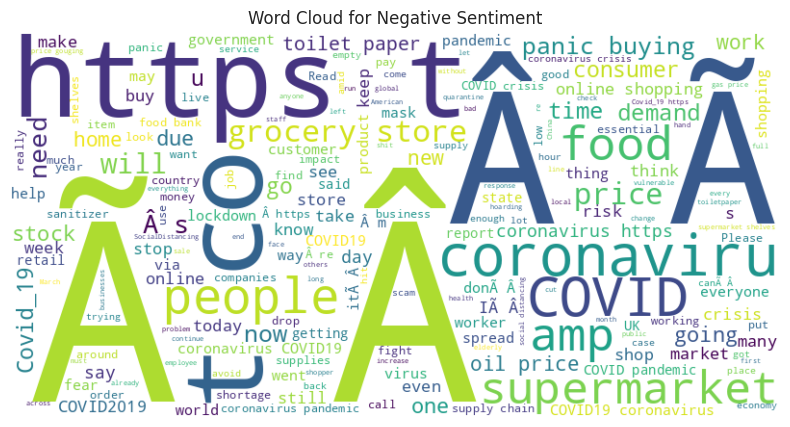

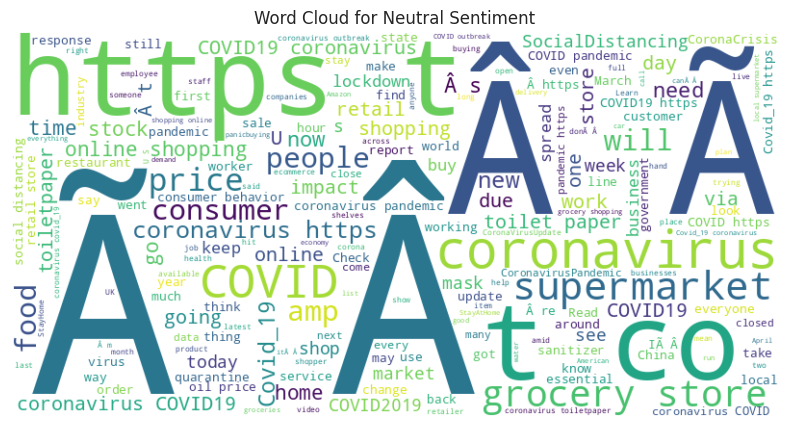

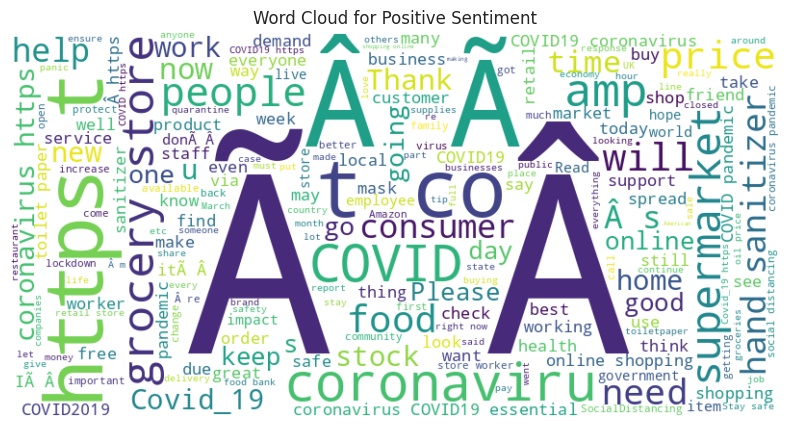

In [ ]:
grouped = train_df.groupby('Sentiment')['OriginalTweet'].apply(' '.join).reset_index()

# Generate word clouds for each sentiment
for sentiment, text in zip(grouped['Sentiment'], grouped['OriginalTweet']):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()


##   **Data Pre-Processing**  (2 Points)

####  Clean and Transform the data into a specified format

- Use regex package for cleaning the punctuations and unnecessary symbols
- Encode the categories of tweets i.e. Sentiment column of dataset
- Drop the columns which are not useful for the classification
task
- Remove stop words (Stop words are actually the most common words in any language (like articles, prepositions, pronouns, conjunctions, etc) and does not add much information to the text.
- Tokenize the sentences
- Set the MAX_NB_WORDS of tokenizer method in keras
- Set MAX_SEQUENCE_LENGTH for padding/trimming sequences of fixed length
-  


In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stop_words = set(stopwords.words('english'))
train_df["OriginalTweet"]  = train_df['OriginalTweet'].apply(lambda x:x.lower())

<ipython-input-14-df41c9e05448>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def clean_data(text):
    text = str(text).strip()
    text = text.replace("?","")
    text = re.sub(r"http\S+","",text)
    text = re.sub(r"@\w+","",text)
    text = re.sub(r"#\w+","",text)
    text = re.sub(r"\d+","",text)
    text = re.sub(r"<.*?>","",text)
    text = text.split()
    text = " ".join([word for word in text if not word in stop_words])
    #text - str(text).strip()
    return text

In [ ]:
train_df["OriginalTweet"] = train_df['OriginalTweet'].apply(lambda x : clean_data(x))


<ipython-input-16-629a5024f180>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train_df['Sentiment'].unique()
l = dict()
for idx,lbl in enumerate(train_df['Sentiment'].unique()):
    l[lbl] = idx

train_df['Sentiment'] = train_df['Sentiment'].map(l)

max_len = 25

<ipython-input-17-61a4af826600>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_train = train_df[["OriginalTweet"]]
y_train = train_df[["Sentiment"]]
X_test = test[['OriginalTweet']]
y_test = test[["Sentiment"]]

In [ ]:
y_train.value_counts()

Sentiment
0            12533
2            10665
1             5318
dtype: int64

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((28516, 1), (28516, 1), (8955, 1), (8955, 1))

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
X_train.columns

Index(['OriginalTweet'], dtype='object')

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train["OriginalTweet"])
vocab_length = len(tokenizer.word_index) + 1

x_train = tokenizer.texts_to_sequences(X_train["OriginalTweet"])
x_test = tokenizer.texts_to_sequences(X_test["OriginalTweet"])

In [ ]:
x_train = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test = pad_sequences(x_test, maxlen=max_len, padding='post')

print("Vocab length:", vocab_length)
print("Max sequence length:", max_len)

Vocab length: 30180
Max sequence length: 25


##   **Build the Word Embeddings using pretrained Word2vec/Glove (Text Representation)** (3 Points)

- Download and load  word embeddings  
- Create a weight matrix for words in the training data



In [ ]:
#@title Download Word embeddings

!wget -qq https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/glove.6B.zip
!unzip glove.6B.zip

In [ ]:
embeddings_index = {}
# Loading the 300-dimensional vector of the model
f = open('glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))
# Adding 1 because of reversed 0 index
words_not_found = []
vocab_size = len(tokenizer.word_index) + 1
print('Loaded %s word vectors.' % len(embeddings_index))

embedding_dim = 300

# Create a weight matrix for words in the training data
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
                embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)

Found 400000 word vectors.
Loaded 400000 word vectors.


In [ ]:
MAX_NB_WORDS = 10000
MAX_SEQ_LENGTH = 25
embedding_layer = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                            input_length=MAX_SEQ_LENGTH, trainable=False)

print(embedding_layer)


##   **Build and Train the Deep Recurrent Model using RNN/LSTM** (2 points)

- Create and Embedding layer to feed to LSTM
    - input_dim: Size of the vocabulary
    - output_dim: Dimension of the dense embedding

- The ouput of embedding layers is fed to LSTM
- Compile the model,train and tweak the hyperparameters
- Calculate the train set accuracy

In [ ]:
# Create an LSTM model
model = Sequential()

# Add the Embedding layer as the first layer
model.add(embedding_layer)

# Add one or more LSTM layers
model.add(LSTM(128, activation = 'relu', dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True))  # You can adjust the number of units and other hyperparameters
model.add(LSTM(128, activation = 'relu', dropout = 0.2, recurrent_dropout = 0.2, return_sequences=True))  # You can adjust the number of units and other hyperparameters
model.add(LSTM(64, activation = 'relu', dropout = 0.2, recurrent_dropout = 0.2, return_sequences=False))  # You can adjust the number of units and other hyperparameters


# Add output layers based on your task (e.g., classification or regression)
model.add(Dense(3, activation='softmax'))  # Example for binary classification

# Compile the model with an appropriate loss and optimizer
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 25, 300)           9054000   
                                                                 
 lstm_7 (LSTM)               (None, 25, 128)           219648    
                                                                 
 lstm_8 (LSTM)               (None, 25, 128)           131584    
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 9454835 (36.07 MB)
Trainable params: 400835 (1.53 MB)
Non-trainable params: 9054000 (34.54 MB)
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


##   **Evaluate the Model and get model predictions on the test dataset** (1 Points)

* Evaluate the model on test set







In [ ]:
Counter(y_train)

TypeError: ignored

In [ ]:
y_train.columns


Index(['Sentiment'], dtype='object')

In [ ]:
y_train.head()

,Sentiment
0,0
2,1
3,2
4,0
5,2


In [ ]:
y_train.shape

(28516, 1)

In [ ]:
x_train.shape

(28516, 25)

In [ ]:
y_train = np.array(y_train).reshape(-1,1)

In [ ]:
from keras.utils import to_categorical

# Convert integer labels to one-hot encoding
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
type(y_train)
type(x_train)

numpy.ndarray

In [ ]:
num_epochs = 10
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=64)


Epoch 1/10


TypeError: ignored

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=5)

Epoch 1/5


TypeError: ignored